In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diabetes-data-set/diabetes.csv


In [3]:
df = pd.read_csv("/kaggle/input/diabetes-data-set/diabetes.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploring Dataset

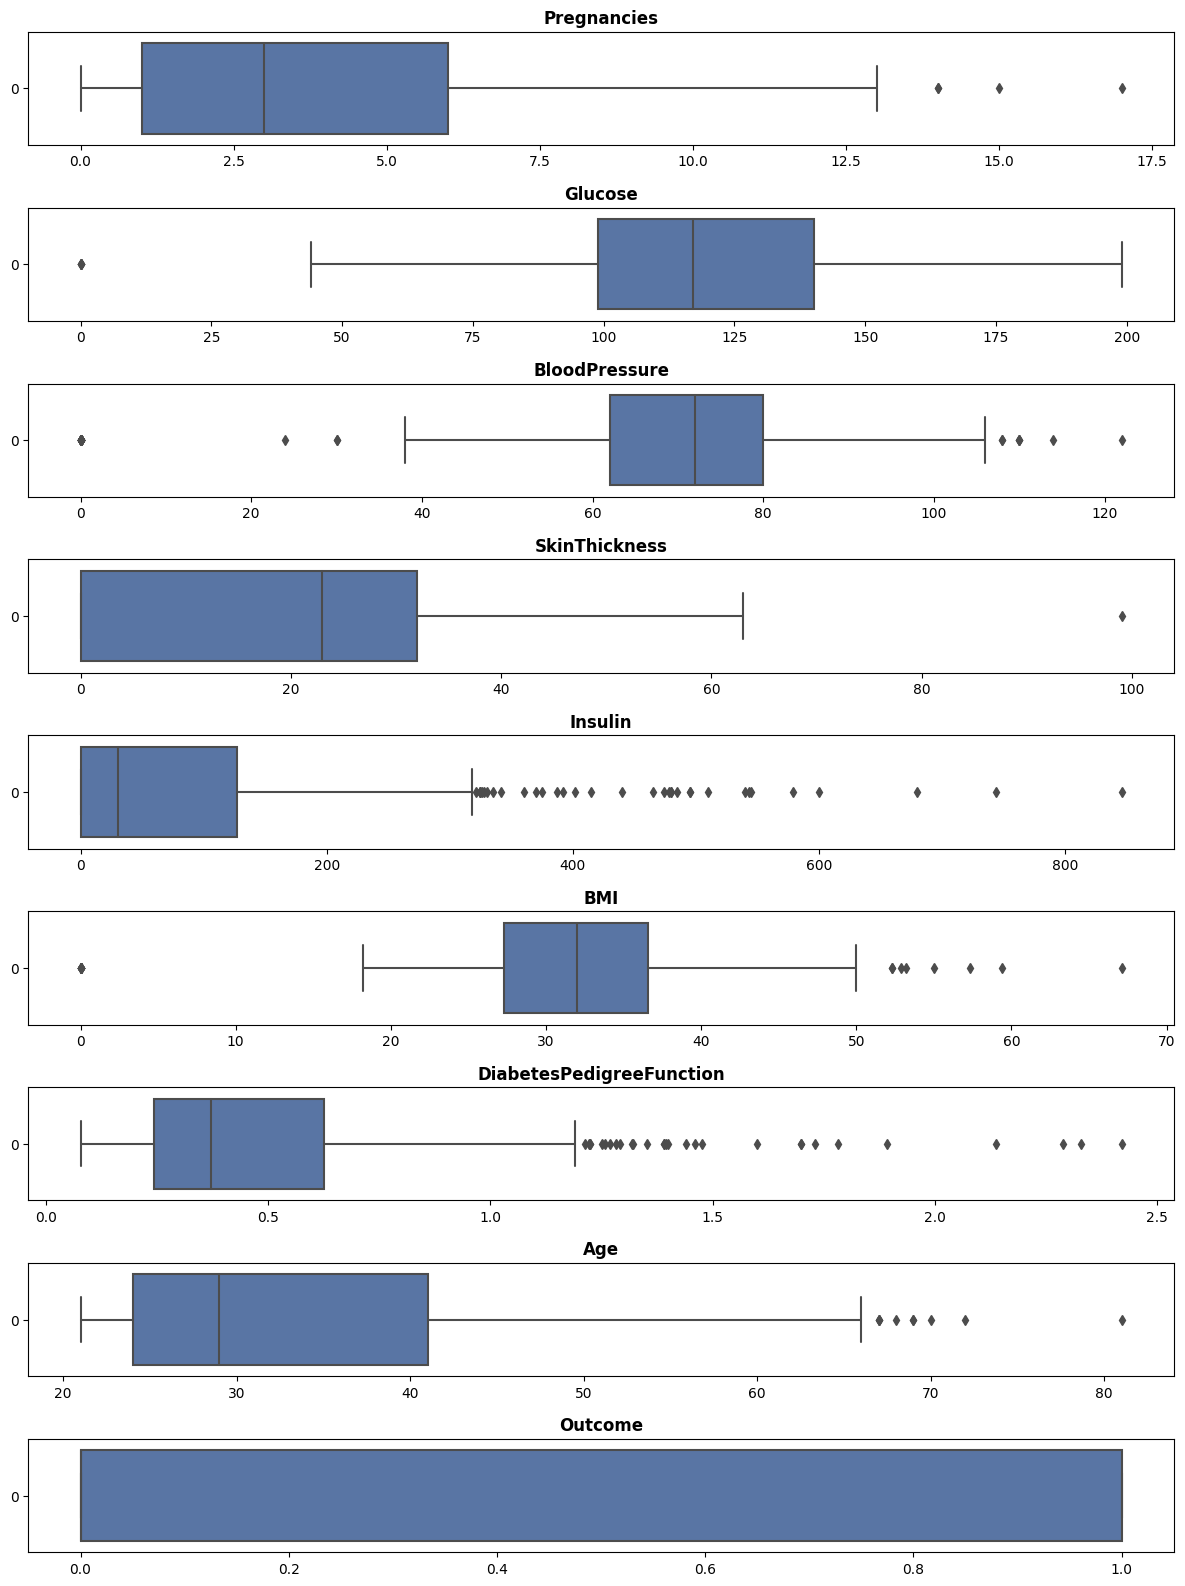

In [6]:
fig, axes = plt.subplots(len(df.columns),1,figsize=(12,16))

for n, ticker in enumerate(df.columns):
    sns.set(style="whitegrid")
    sns.boxplot(df[ticker],orient="h",ax=axes[n])
    axes[n].set_title(ticker,fontweight='bold')
fig.tight_layout(pad=1.0)
plt.show()

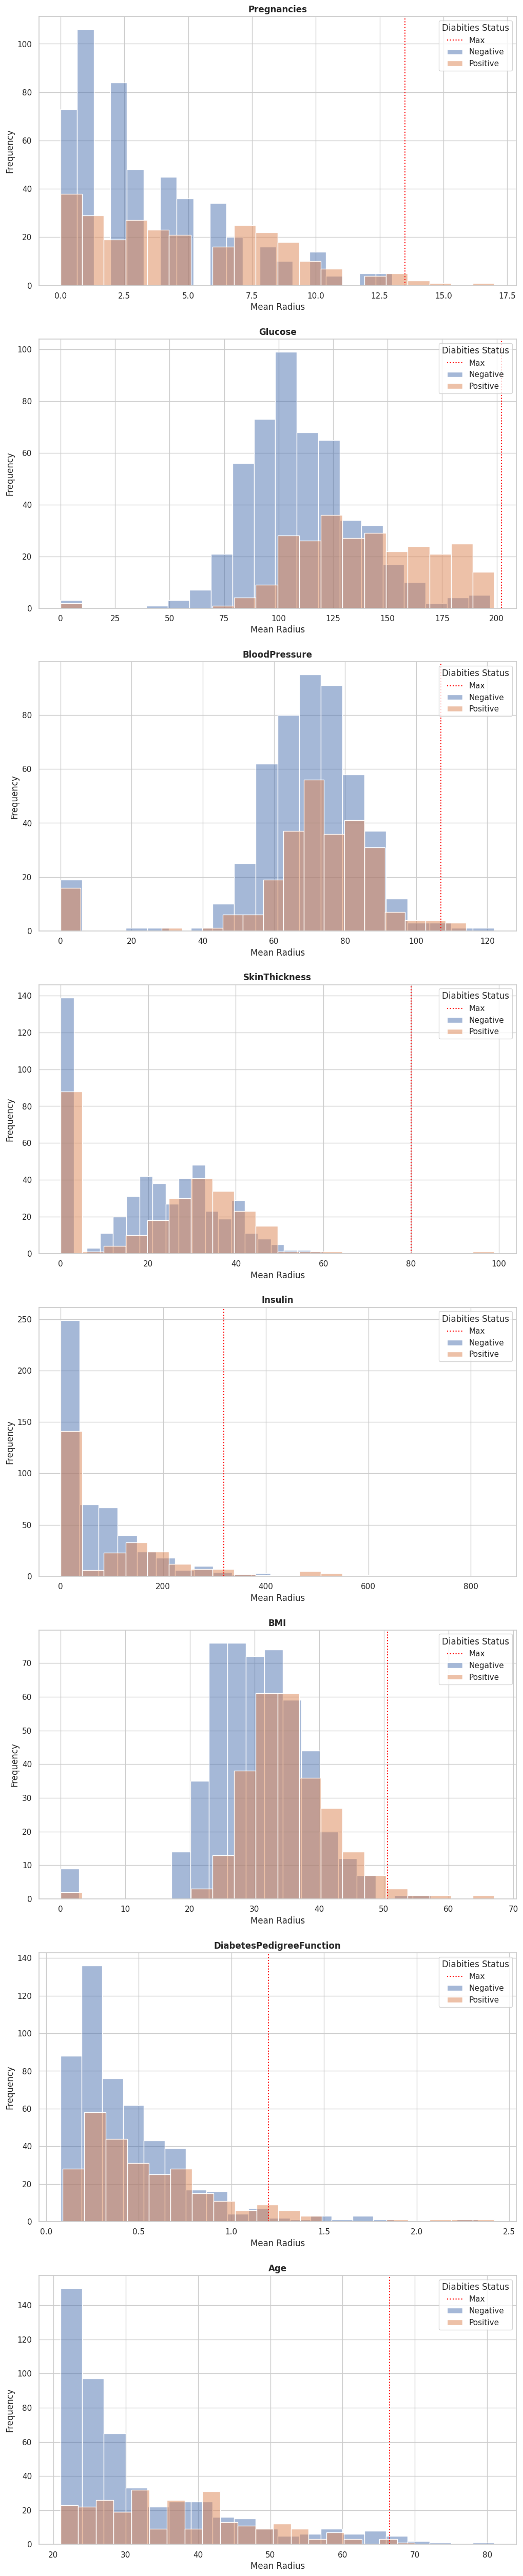

In [7]:
fig, axes = plt.subplots(len(df.columns[:-1]),1,figsize=(12,len(df.columns[:-1])*8))

for n, ticker in enumerate(df.columns[:-1]):
    Q1=np.percentile(df[ticker],25)
    Q3=np.percentile(df[ticker],75)
    IQR = Q3-Q1
    Max = Q3+(1.5*IQR)
    sns.histplot(df[df['Outcome']== 0].loc[:,ticker], bins=20, alpha=0.5, label='Negative',ax=axes[n])
    sns.histplot(df[df['Outcome']== 1].loc[:,ticker], bins=20, alpha=0.5, label='Positive',ax=axes[n])
    axes[n].set_xlabel('Mean Radius')
    axes[n].set_ylabel('Frequency')
    axes[n].axvline(Max,color="red",linestyle="dotted",label="Max")
    axes[n].legend(loc='upper right',title="Diabities Status")
    axes[n].set_title(ticker,fontweight="bold")

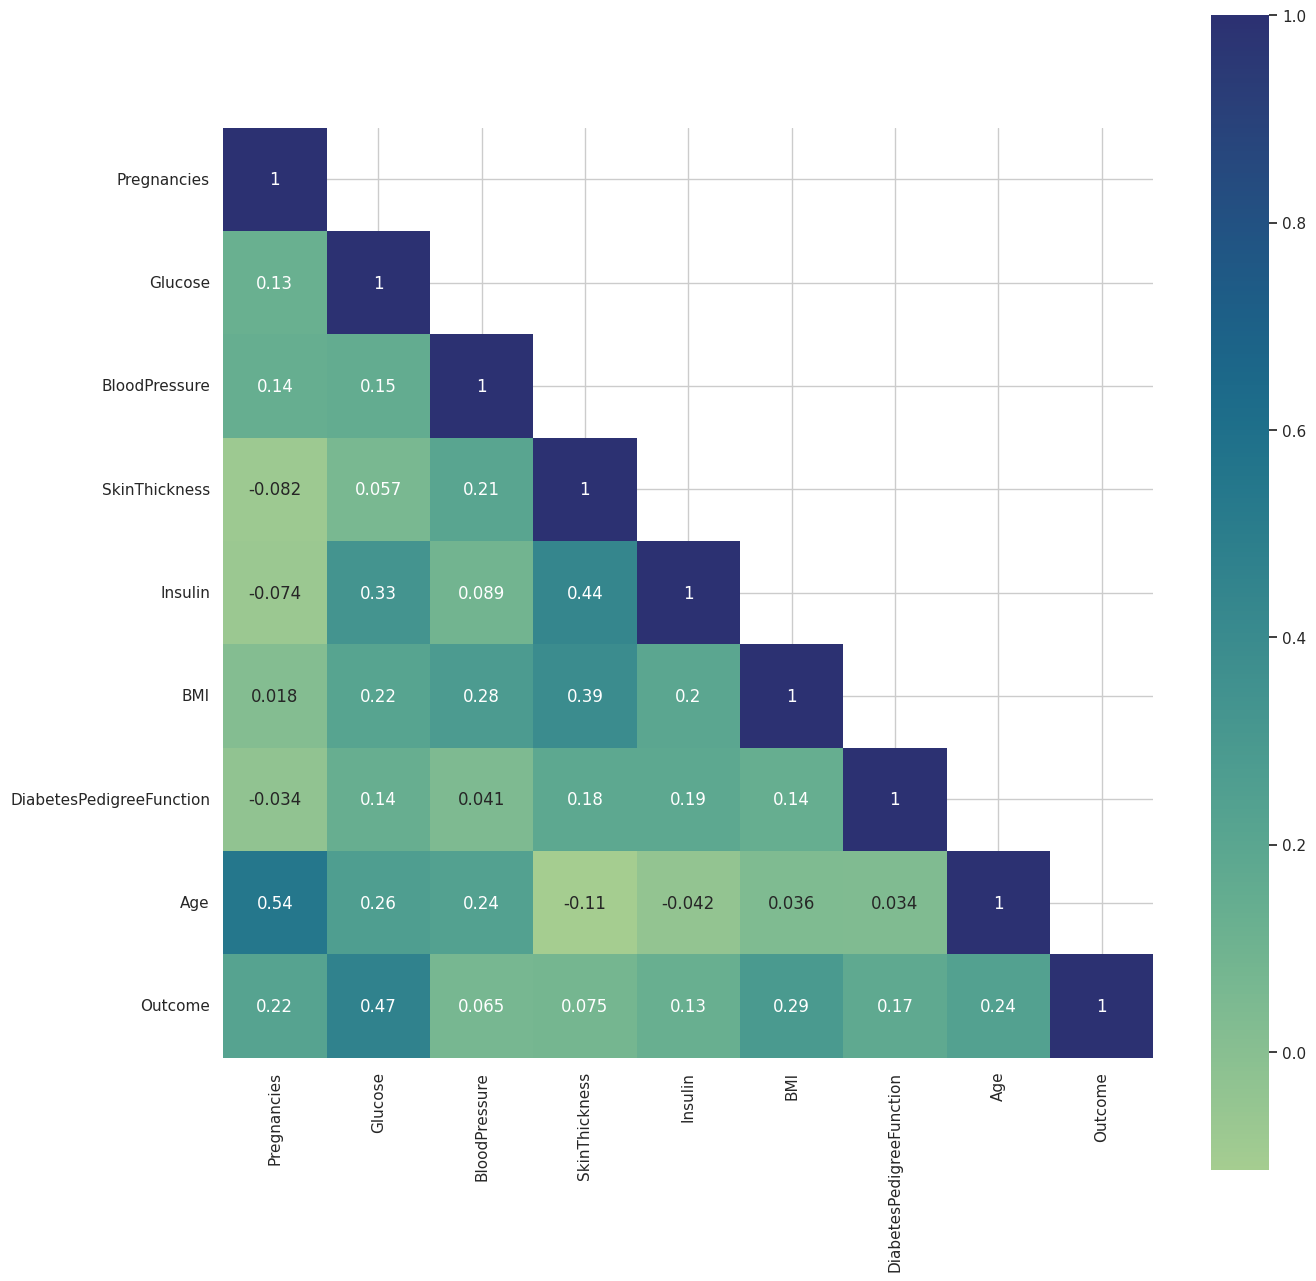

In [8]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool), k=1)

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True,mask=mask,  square=True, cmap='crest')
plt.show()